# EDA on Advertisement Data Analysis

This dataset file consists of advertising expenditure incurred on different mediums and the overall increase in revenue that was seen during that time.

The dataset contains statistics about the increase in sales of a product in 200 different months, together with advertising budgets in each of these months for different media channels: TV, radio and newspaper. The budget and the increase in sales is in thousands of dollars.

Here we have build the model using Linear regression and KNN and we can conculde that KNN gives us a good RMSE and Raquare value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data into a Dataframe
data=pd.read_csv(r"C:\Users\Sushmitha\Downloads\Advertising.csv",index_col=0,header=0)# here index_col we are putting as 0 because 1st column is index column we dnt use it in the project
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# doing structal EDA
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [4]:
# checking for missing values
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

###### Insight: We have no missing values in this dataset 

### Pre-Processing

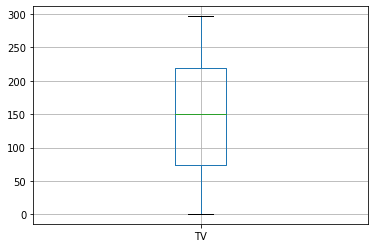

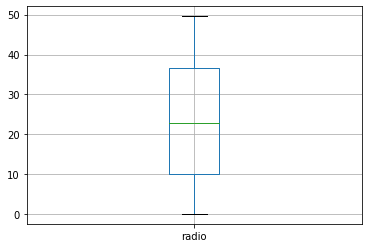

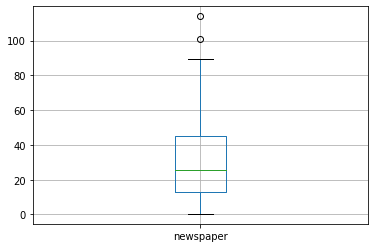

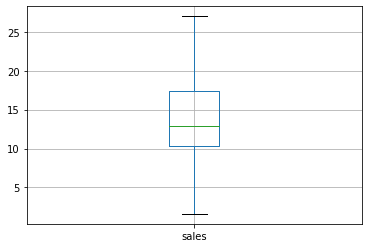

In [6]:
#Assumption 1:There should be no outliers in the data
#check using boxplot
for i in data.columns:  # we are checking for each columns
    data.boxplot(column=i)
    plt.show()

###### Insight: From the assumption 1 we can observe that newspaper variable has outlier so we go ahead and check with the client if that outlier data points are valid points if not we can remove the outliers.
###### Insight: Here we are not removing the outliers let us go head and check for another assumption 

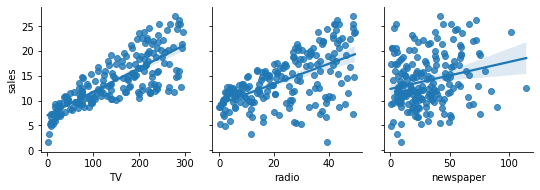

In [7]:
#Assumption 2:Assumption of linearity;Every independent var should have as liner relationship with the dependent variable
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',kind='reg')# here x_vars are we are taking x variables and y_vars we are taking y variable and kind is we want regression line
plt.show()

###### Insights:Here from Assumption 2 we can see that Tv variable shows strong postive relation and radion variable shows moderate postive relation and newspaper variable shows no relation

###### Insights:So here we will go ahead and drop the newspaper variable 

In [8]:
# Dropping the newspaper variable 
data.drop(['newspaper'],axis=1,inplace=True)

In [9]:
#checking the demension 
data.shape

(200, 3)

#### Creating X and Y

In [10]:
X=data.loc[:,['TV','radio']]# all rows : and 2 columns that is tv and radio 
Y=data.loc[:,'sales'] # all rows and 1 column that is sales

In [11]:
# to check if the x and y is created 
print(X.shape)
print(Y.shape)

(200, 2)
(200,)


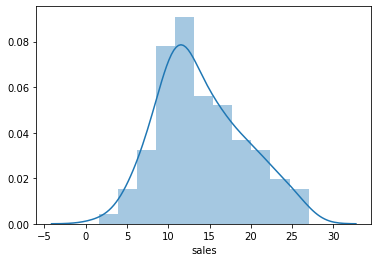

In [12]:
#Assumption of normality:The dependent variable should follow on approximate normal distrbution 
sns.distplot(Y)
plt.show()

###### Insights: Here from Assumption of normality we can observe that the sales variable is approximate normal distrbution with slight right skewed.


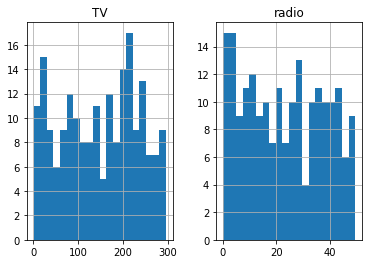

In [14]:
# checking the assumption of normality for X variables
X.hist(bins=20)
plt.show()

###### Insight: Here from Assumption of normality we can observe that both the variables are noramly distributed

             TV     radio
TV     1.000000  0.054809
radio  0.054809  1.000000


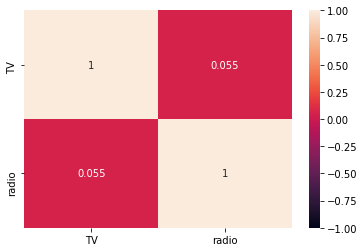

In [16]:
#Assumption of  no multicollinearity: There should be no multicollinearity between the 
#independent varoables multicollinearity is the relationship amongst the independent variables
corr_df=X.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)# here vmax and vmin is for the colours in the heatmap given below and annot=true for the label inside the heatmap
plt.show()

###### Insights: Here from the Assumption of  no multicollinearity  using heat map method we  can se that radio and Tv are not corellated

In [18]:
#VIF method to check the multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()# creating the empty dataframe frame
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]# storing x vlaues independent values X.values will take all the values of X variables and compre with each and every dependent varibale that is i each at time
vif_df.round(2)# rounding off

,features,VIF Factor
0,TV,2.24
1,radio,2.24


###### Insights:Here from Assumption of multicollinearity we can observe that Tv and Radio  variable VIF Factor is less than 5 which means there are not corellated

### Training phase

In [20]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [21]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(160, 2)
(160,)
(40, 2)
(40,)


##### Building the model

In [23]:
from sklearn.linear_model import LinearRegression
#create a model object
lm=LinearRegression()
#train the model object
lm.fit(X_train,Y_train)# fit function is used to train the model
#print intercept and coeeficients
print(lm.intercept_) #to get dependent values 
print(lm.coef_)# to get independent values that is x values 

3.2170261085129717
[0.04372065 0.19242472]


In [24]:
# now to get the names of which x values these are we use this 
#pair the feature names with the cofficient
print(list(zip(X.columns,lm.coef_)))

[('TV', 0.04372064804168898), ('radio', 0.19242471657994656)]


###### Insight: Here Tv gives 0.04372064804168898 profit and radio gives 0.19242471657994656 profit

In [26]:
#predict using the model
Y_pred=lm.predict(X_test)# we dnt pass y test on the model 
print(Y_pred)

[18.10549579 13.00696439 18.09578029 23.69803999 20.70228503 14.25602829
 14.93688357 21.418844   21.14310766 12.80131575 24.02246336  7.2230243
 12.36486517 19.24592959 19.46623318 13.40290827 19.55950449  9.20661663
 21.09644597 20.85811367 15.48792533 10.86764934 22.85776684 15.86934534
 17.41104133  8.21459064 11.84083864 12.72488631 21.69123531  7.94168761
 12.51565024 20.43974568  4.72722348  4.75607372 16.71555983 15.75710627
  6.72342208 17.68650834  9.04377293 13.59474227]


In [28]:
#This step is optional its is just to chcek actual value and predicted value 

new_df=pd.DataFrame()
new_df=X_test.copy()

new_df['Actual sales']=Y_test
new_df['Predicted sales']=Y_pred
new_df=new_df.reset_index().drop('index',axis=1)
new_df

,TV,radio,Actual sales,Predicted sales
0,210.7,29.5,18.4,18.105496
1,8.7,48.9,7.2,13.006964
2,218.4,27.7,18.0,18.095780
3,283.6,42.0,25.5,23.698040
4,216.4,41.7,22.6,20.702285
5,147.3,23.9,14.6,14.256028
6,188.4,18.1,14.9,14.936884
7,198.9,49.4,23.7,21.418844
8,216.8,43.9,22.3,21.143108
9,17.2,45.9,9.3,12.801316


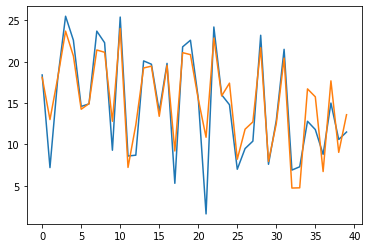

In [29]:
new_df['Actual sales'].plot()
new_df['Predicted sales'].plot()
plt.show()

In [30]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print('R-squared:',r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8354496662944217
RMSE: 2.5878817077378105
Adj R-square: 0.8337791045309133


###### Insight : Here we can observe that R-squared: 0.8354496662944217,RMSE: 2.5878817077378105,Adj R-square: 0.8337791045309133

## Ridge Regression

In [31]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [32]:
from sklearn.linear_model import Ridge
#create a model object
lm=Ridge()
#train the model object
lm.fit(X_train,Y_train)# fit function is used to train the model
#print intercept and coeeficients
print(lm.intercept_) #to get dependent values 
print(lm.coef_)# to get independent values that is x values 

3.217150827823975
[0.04372067 0.19241894]


In [33]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.10545511 13.00680665 18.0957502  23.69792882 20.70217396 14.25601844
 14.93690824 21.418688   21.14298389 12.80117556 24.0223506   7.2231171
 12.3647377  19.24586776 19.46617677 13.40286439 19.55947993  9.20656865
 21.09635691 20.85798268 15.48793265 10.86754517 22.85765108 15.86923806
 17.41111448  8.21459038 11.84073855 12.72478493 21.69112597  7.94169662
 12.5156718  20.43965801  4.72733962  4.75619046 16.71566792 15.75722442
  6.72354875 17.6865787   9.04384261 13.59485274]


In [34]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print('R-squared:',r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared) 

R-squared: 0.835451084422515
RMSE: 2.587870556269514
Adj R-square: 0.8337805370562461


###### Insight : Here we can observe that R-squared:  0.835451084422515,RMSE:  2.587870556269514,Adj R-square: 0.8337805370562461

## Lasso Regression

In [35]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [36]:
from sklearn.linear_model import Lasso
#create a model object
lm=Lasso()
#train the model object
lm.fit(X_train,Y_train)# fit function is used to train the model
#print intercept and coeeficients
print(lm.intercept_) #to get dependent values 
print(lm.coef_)# to get independent values that is x values 

3.336794058220317
[0.04362374 0.18766033]


In [37]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.06429565 12.89291061 18.06240985 23.59022036 20.60240696 14.24765273
 14.95215852 21.28397604 21.03270918 12.70073142 23.91262327  7.30875314
 12.27479157 19.18615151 19.40987087 13.37169781 19.52635995  9.18340605
 21.01174436 20.74314144 15.48896526 10.79867965 22.74877319 15.78495133
 17.45553519  8.22914947 11.77231457 12.65310134 21.59003277  7.96379194
 12.53499059 20.35780103  4.83670342  4.8659235  16.78762249 15.83910155
  6.83541797 17.72822269  9.10768074 13.67675885]


In [38]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print('R-squared:',r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8343862056075662


###### Insight:Here we can observe that R-squared: 0.8360506658527163,RMSE: 2.5831514271094234,Adj R-square: 0.8343862056075662

### OLS 

In [39]:
new_df=pd.DataFrame()
new_df=X_train.copy()# we are copying only the training phase data that is 160 observation so that we can compare

new_df['sales']=Y_train.copy()
new_df.shape


(160, 3)

In [41]:
import statsmodels.formula.api as sm

#create a fitted model with all three features
lm_model=sm.ols(formula='sales ~ TV + radio',data=new_df).fit()

#print the cofficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           3.47e-87
Time:                        15:52:40   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

###### Insight: Here we can observe that Durbin-Watson: 2.100 which means there is no auto-correlation

In [42]:
Y_pred_new=lm_model.predict(X_test)

In [43]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print('R-squared:',r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8354496662944217
RMSE: 2.587881707737811
Adj R-square: 0.8337791045309133


###### Insight:Here we can observe that R-squared: 0.8354496662944217,RMSE: 2.587881707737811,Adj R-square: 0.8337791045309133

### Post Model Building

In [ ]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(model_fitted_y, 'sales', data=new_df, lowess=True)# IT WILL PLOT PREDICTED AND ACTUAL VALIE IN RESIDPLOYT
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

###### Insight: Here from the post model building assumption 1: Errors should be random and from this graph the error is not in the wave form which means that errors are random 

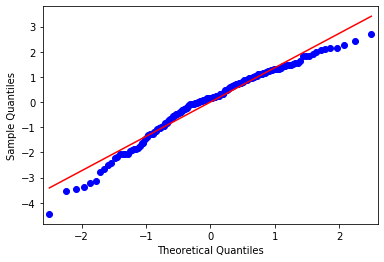

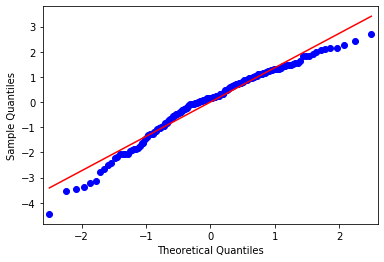

In [46]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')

###### Insight:Here we can see that most of that error points lies in the line which means errors are approximate normal distribution

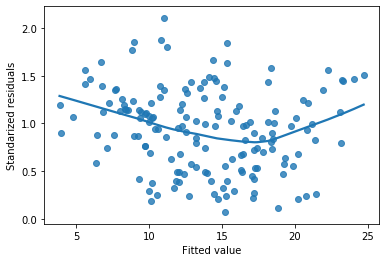

In [47]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))

sns.regplot(lm_model.fittedvalues,
            model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()


###### Insights: Here errors are almost in horizontal way which means errors follow a constant variance

## SGD

In [48]:
np.set_printoptions(suppress=True)

In [49]:
X=data[['TV','radio']]
Y=data['sales']

In [50]:
from sklearn.preprocessing import StandardScaler
# we do scaling only on X as they have multiple value 
scaler=StandardScaler()
X=scaler.fit_transform(X)
#scaler.fit(X)
#X=scaler.transform(X)
print(X)

[[ 0.96985227  0.98152247]
 [-1.19737623  1.08280781]
 [-1.51615499  1.52846331]
 [ 0.05204968  1.21785493]
 [ 0.3941822  -0.84161366]
 [-1.61540845  1.73103399]
 [-1.04557682  0.64390467]
 [-0.31343659 -0.24740632]
 [-1.61657614 -1.42906863]
 [ 0.61604287 -1.39530685]
 [-0.94515567 -1.17923146]
 [ 0.79002835  0.04969734]
 [-1.4390876   0.79920886]
 [-0.57850171 -1.05768905]
 [ 0.66625345  0.65065703]
 [ 0.56466461  1.65000572]
 [-0.92530498  0.9004942 ]
 [ 1.56887609  1.10306488]
 [-0.90895735 -0.18663512]
 [ 0.0030068   0.04294498]
 [ 0.8332328   0.29953451]
 [ 1.05509347 -1.22649795]
 [-1.5628625  -0.4972435 ]
 [ 0.94883389 -0.42971994]
 [-0.98952781 -0.72007125]
 [ 1.35285385 -1.33453565]
 [-0.04837147  0.40757221]
 [ 1.08662104 -0.44322465]
 [ 1.18820988  0.25902038]
 [-0.89260972 -0.49049114]
 [ 1.70316018  0.34004865]
 [-0.3986778  -0.39595816]
 [-0.58200477 -1.46958277]
 [ 1.38438142 -0.2203969 ]
 [-0.59952009 -1.47633512]
 [ 1.67747105 -1.29402151]
 [ 1.39956136  1.38666383]
 

In [51]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [52]:
from sklearn.linear_model import SGDRegressor

lm = SGDRegressor(learning_rate="constant",  
                  #want to use a constant learning rate
                  eta0=0.1,  #alpha
                  shuffle=True, # to shuffle the data aftr each epoch
        #while going ahead with the next epoch shuffle the obs
                  random_state=10, #set seed
                  max_iter=1000, #max no of epochs
                  early_stopping=True,
                  #stop if zero convergence is reached first
                  n_iter_no_change=5) 
        #no of obs to wait for before concluding upon early stopping
lm.fit(X_train,Y_train)


# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

[13.98890698]
[3.85235512 2.97443256]


In [53]:
Y_pred_new=lm.predict(X_test)

In [54]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print('R-squared:',r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8405363683205531
RMSE: 2.5475684538895353
Adj R-square: 0.8389174482019801


In [55]:
lm.n_iter_

11

In [56]:
lm.t_

1761.0

### Insight : Here from this we can conculde that SGD works well compared to base model ,lasso ,ridge and OLS

# KNN Model

In [58]:
data1=pd.read_csv(r"C:\Users\Sushmitha\Downloads\Advertising.csv",index_col=0,header=0)

In [59]:
data1.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [60]:
# Recreating X and Y
X=data1[['TV','radio','newspaper']]# all rows : and 3 columns that is tv radio and newspaper
Y=data1['sales']

In [61]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [62]:
int(np.sqrt(len(X_train)))

12

In [63]:
#predicting using the Kneighbors_regressor

from sklearn.neighbors import KNeighborsRegressor
model_KNN=KNeighborsRegressor(n_neighbors=12,metric='euclidean')

#fit the  model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred)))
Y_pred# average of all the values is the Y_pred values

array([16.64166667,  7.79166667, 18.125     , 21.64166667, 19.46666667,
       12.84166667, 14.575     , 19.5       , 19.03333333,  7.85      ,
       21.48333333,  9.8       ,  8.65833333, 18.20833333, 17.98333333,
       11.71666667, 18.00833333,  6.85      , 19.61666667, 19.08333333,
       14.70833333,  7.31666667, 21.85833333, 14.45833333, 18.20833333,
        7.5       ,  9.03333333, 10.79166667, 19.925     ,  7.00833333,
       12.875     , 19.3       ,  6.95833333,  7.39166667, 17.625     ,
       16.75833333,  9.95      , 18.20833333, 10.64166667, 13.7       ])

In [64]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print('R-squared:',r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8483613805522731
RMSE: 2.4842765965836686
Adj R-square: 0.8460403812750119


## Insight: Here from this we can conculde that KNN model  works well compared to base model ,lasso ,ridge ,SGD and OLS